<a href="https://colab.research.google.com/github/rebeccasoren/COVID19_Analysis/blob/master/covid19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the datasets

In [2]:
!wget https://raw.githubusercontent.com/rebeccasoren/COVID19_Analysis/master/Datasets/covid19_confirmed_global.csv
!wget https://raw.githubusercontent.com/rebeccasoren/COVID19_Analysis/master/Datasets/WHR20.csv

--2020-08-04 07:50:18--  https://raw.githubusercontent.com/rebeccasoren/COVID19_Analysis/master/Datasets/covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150542 (147K) [text/plain]
Saving to: ‘covid19_confirmed_global.csv’

covid19_confirmed_g 100%[===================>] 147.01K  --.-KB/s    in 0.03s   

2020-08-04 07:50:19 (4.23 MB/s) - ‘covid19_confirmed_global.csv’ saved [150542/150542]

--2020-08-04 07:50:21--  https://raw.githubusercontent.com/rebeccasoren/COVID19_Analysis/master/Datasets/WHR20.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent

In [3]:
covid_dataset=pd.read_csv('covid19_confirmed_global.csv')
covid_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186


In [4]:
happiness_report=pd.read_csv('WHR20.csv')
happiness_report.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


## Reformat Covid 19 Dataset
Delete useless columns and aggregate rows by country

In [5]:
covid_dataset.drop(["Lat", "Long"], axis=1, inplace=True)
covid_dataset_aggregated=covid_dataset.groupby("Country/Region").sum()
covid_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186


## Reformat Happiness Report
Delete useless columns and set index to country. 

In [6]:
#select needed columns for analysis
useless_cols=['Regional indicator', 'Ladder score', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Generosity', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']
happiness_report.drop(useless_cols, axis=1, inplace=True)
happiness_report.set_index("Country name", inplace=True)
happiness_report.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Ladder score in Dystopia
Country name,,,,,,
Finland,10.639267,0.954330,71.900825,0.949172,0.195445,1.972317
Denmark,10.774001,0.955991,72.402504,0.951444,0.168489,1.972317
Switzerland,10.979933,0.942847,74.102448,0.921337,0.303728,1.972317
Iceland,10.772559,0.974670,73.000000,0.948892,0.711710,1.972317
Norway,11.087804,0.952487,73.200783,0.955750,0.263218,1.972317


## Visualising Aggregated Data 
Plot of spread of corona virus in 10 most infected countries in the world

List of 10 most infected countries: ['US', 'Brazil', 'Russia', 'India', 'United Kingdom', 'Peru', 'Spain', 'Italy', 'Chile', 'Iran']


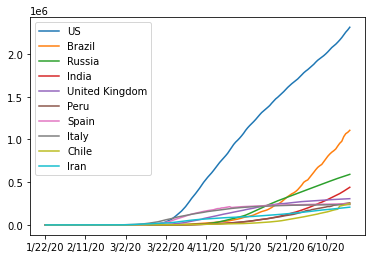

In [7]:
# from datetime import timedelta 
# from datetime import date 
# today = date.today()  
# yesterday = today - timedelta(days = 2) 
# date=yesterday.strftime("%-m/%d/%y")
# print("Date:",date)
countries=list(covid_dataset_aggregated.nlargest(10, ['6/20/20']).index.values)
print("List of 10 most infected countries:",countries)
for c in countries:
  covid_dataset_aggregated.loc[c].plot()
plt.legend()

## Finding max infection rate for all countries


In [8]:
countries=list(covid_dataset_aggregated.index)
max_infection_rate=[]
for c in countries:
    max_infection_rate.append(covid_dataset_aggregated.loc[c].diff().max())
covid_dataset_aggregated["Max Infection Rate"]=max_infection_rate
covid_data=pd.DataFrame(covid_dataset_aggregated["Max Infection Rate"])
# Create new dataframe with only needed columns.
covid_data=pd.DataFrame(covid_dataset_aggregated["Max Infection Rate"])
covid_data.head()

,Max Infection Rate
Country/Region,
Afghanistan,915.0
Albania,82.0
Algeria,199.0
Andorra,79.0
Angola,17.0


## Joining datasets

In [9]:
data=covid_data.join(happiness_report, how="inner")
data.head()

,Max Infection Rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Ladder score in Dystopia
Afghanistan,915.0,7.462861,0.470367,52.590000,0.396573,0.933687,1.972317
Albania,82.0,9.417931,0.671070,68.708138,0.781994,0.896304,1.972317
Algeria,199.0,9.537965,0.803385,65.905174,0.466611,0.735485,1.972317
Argentina,2146.0,9.810955,0.900568,68.803802,0.831132,0.842010,1.972317
Armenia,766.0,9.100476,0.757479,66.750656,0.712018,0.773545,1.972317


## Creating Correlation Matrix

In [10]:
data.corr()

,Max Infection Rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Ladder score in Dystopia
Max Infection Rate,1.000000e+00,1.558140e-01,1.228729e-01,1.643385e-01,4.799609e-02,8.555349e-03,-1.404164e-16
Logged GDP per capita,1.558140e-01,1.000000e+00,7.888766e-01,8.587247e-01,4.407609e-01,-3.386514e-01,-1.972453e-15
Social support,1.228729e-01,7.888766e-01,1.000000e+00,7.649773e-01,4.868377e-01,-2.245086e-01,-1.731505e-15
Healthy life expectancy,1.643385e-01,8.587247e-01,7.649773e-01,1.000000e+00,4.787323e-01,-3.614685e-01,3.229268e-15
Freedom to make life choices,4.799609e-02,4.407609e-01,4.868377e-01,4.787323e-01,1.000000e+00,-4.289070e-01,-2.971206e-15
Perceptions of corruption,8.555349e-03,-3.386514e-01,-2.245086e-01,-3.614685e-01,-4.289070e-01,1.000000e+00,3.465910e-16
Ladder score in Dystopia,-1.404164e-16,-1.972453e-15,-1.731505e-15,3.229268e-15,-2.971206e-15,3.465910e-16,1.000000e+00


**Observations:**

1. There is **negative correlation** between Max 
Infection Rate and Ladder score in Dystopia.
2. There is a **positive correlation** between Max Infection Rate and the following attributes:
 Logged GDP per capita, Social Support, Healthy Life expectancy, Freedom to make life choices, Perceptions of corruption






## Visualization of Results
Plots for attributes with positive correlation with Max Infection Rate.

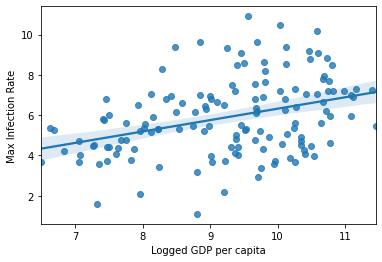

In [11]:
x=data["Logged GDP per capita"]
y=data["Max Infection Rate"]
sns.regplot(x, np.log(y))

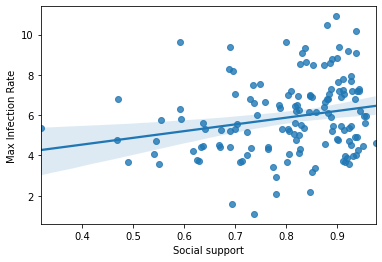

In [12]:
x=data["Social support"]
y=data["Max Infection Rate"]
sns.regplot(x, np.log(y))

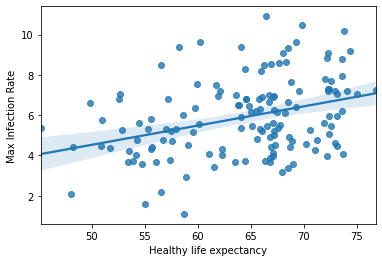

In [13]:
x=data["Healthy life expectancy"]
y=data["Max Infection Rate"]
sns.regplot(x, np.log(y))

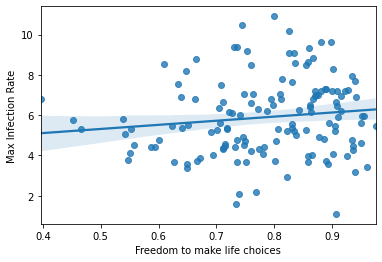

In [14]:
x=data["Freedom to make life choices"]
y=data["Max Infection Rate"]
sns.regplot(x, np.log(y))

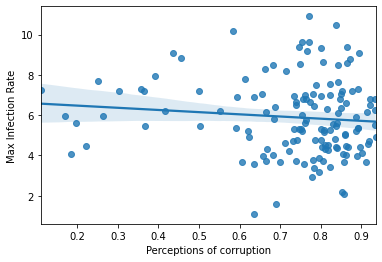

In [15]:
x=data["Perceptions of corruption"]
y=data["Max Infection Rate"]
sns.regplot(x, np.log(y))